In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [3]:
#read the data set, and seperate labels from image pixel values
def get_labels_and_data(csv_path):
    df = pd.read_csv(csv_path,header = None)
    print('Whole dataset shape: ',df.shape,'\n')
    label_df = df[0]
    data_df = df.iloc[:, 1:]
    print(f'labels shape: {label_df.shape}, data shape: {data_df.shape}')
    return label_df, data_df

csv_path = 'mnist.csv'
label_df, data_df = get_labels_and_data(csv_path)

Whole dataset shape:  (6000, 785) 

labels shape: (6000,), data shape: (6000, 784)


In [15]:
label_df.head(5)

0    5.0
1    0.0
2    4.0
3    1.0
4    9.0
Name: 0, dtype: float64

In [16]:
data_df #the pixel values of the image edges are 0

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Q1. PCA

In [35]:
def PCA(data, n_components):
    # Find mean
    mean = np.mean(data, axis = 0)

    #substract mean
    difference = data - mean

    # Calculate the covariance matrix
    cov = np.cov(difference, rowvar = False)

    # Calculate eigenvectors and eigenvalues of the covariance matrix
    eig_value, eig_vector = np.linalg.eig(np.mat(cov))

    # get index from low to high
    idx = np.argsort(eig_value) 

    # reverse it to from high to low
    high_to_low_idx = idx[::-1] 

    # P vector projects the high dimensional data onto 10 dimensions
    P = eig_vector[:,high_to_low_idx[:n_components]].real

    # Transform the centralized data with a matrix P to 10 dimensions
    reduced_data = (difference @ P).real

    return reduced_data, mean, P

# convert df to numpy for the convience of matrix calculations
data = np.array(data_df)

reduced_data, mean, P = PCA(data, 10)
C_y = np.cov(reduced_data,rowvar = 0)

print(f'cov of transformed data:\n {C_y} \n')
print(f'sum: {np.sum(C_y)}\n')

# show dimension reduction
print(f'original data shape: {data.shape}, reduced_data shape: {reduced_data.shape}') # reduced from 28x28 features to 10 features

cov of transformed data:
 [[ 5.30558677e+00  7.69113061e-15 -2.33570641e-15 -8.46871239e-16
  -1.13705789e-16  2.76269533e-15 -2.96108825e-16  8.11338180e-16
   2.70051248e-16  1.42724454e-16]
 [ 7.69113061e-15  3.87701635e+00 -1.53976589e-15 -2.00643340e-15
  -1.39763365e-16  9.77159122e-17  5.17598226e-16 -1.44501106e-16
   5.98139826e-16  1.63452071e-16]
 [-2.33570641e-15 -1.53976589e-15  3.28704664e+00  2.84886300e-15
   1.17259095e-16  3.61030685e-16 -3.37564060e-17  7.30278389e-17
  -1.11336918e-15  4.73774120e-16]
 [-8.46871239e-16 -2.00643340e-15  2.84886300e-15  2.91254096e+00
  -5.06938308e-16 -5.39637976e-15 -4.05076872e-16  1.22574248e-15
   9.95517869e-16  2.33037645e-16]
 [-1.13705789e-16 -1.39763365e-16  1.17259095e-16 -5.06938308e-16
   2.48633206e+00 -2.90956531e-15 -1.39763365e-15  1.07280227e-15
   1.22648275e-15 -3.04992089e-16]
 [ 2.76269533e-15  9.77159122e-17  3.61030685e-16 -5.39637976e-15
  -2.90956531e-15  2.35358942e+00 -2.62441251e-15  1.09116102e-15
   1.74

# Q2. K-means Clustering (Without PCA)

In [55]:
# a helper function returns a matrix of all samples' squared euclidean distance to each centroids (used in Q2 ,and Q4 validation)
def find_dist_sq(data,centroids,k):
    dist_mat = []
    
    for sample in data:
        # i.e. dist_lst = [||Xi - u1||^2, ||Xi - u2||^2, ....,||Xi - uk||^2]
        dist_lst = [np.sum(np.square(sample - centroids[i])) for i in range(k)]
        dist_mat.append(dist_lst)
        
    arr = np.array(dist_mat) # convert back to numpy array for the convinience of numpy operations
    return arr

In [63]:
def kmeans(data,k = 10): # because next Q need to plot iterations vs loss, so did not set convergence condition here
    loss = []
    random.seed(0) #32, 42, 33, 2: at 8.

    #initially random pick k centroids
    idx = random.sample(range(0,data.shape[0]),k)
    centroids = data[idx, :] 

    # get a matrix of squares of distances to all centroids for each sample in each row
    dist_sq_mat = find_dist_sq(data,centroids,k)
    
    # add new loss (sum up all closest dist_sq for all samples)
    loss.append(np.sum([min(dist_row) for dist_row in dist_sq_mat]))
    
    # update cluster group (rik) by assigning each sample to closest cluster -- E Step
    clusters = np.array([np.argmin(i) for i in dist_sq_mat])
    

    converge = False
    ite = 1
    while converge != True:
        ite += 1
        # mask cluster k and update the k centroids(uk) (samples in row, so average each col and get a row for each k) -- M Step
        centroids = np.array([np.mean(data[clusters == k_value],axis = 0) for k_value in range(k)]).reshape(k,data.shape[1])        

        # get a matrix of squares of distances to all centroids for each sample in each row
        dist_sq_mat = find_dist_sq(data,centroids,k)

        # add new loss (sum up all closest dist_sq for all samples)
        loss.append(np.sum([min(dist_row) for dist_row in dist_sq_mat]))

        # update cluster group (rik) by assigning each sample to closest cluster -- E Step
        new_clusters = np.array([np.argmin(i) for i in dist_sq_mat])
            
        #check convergence
        if np.array_equal(clusters, new_clusters):
            converge = True
        else:
            clusters = np.array(new_clusters.copy())
             
    return clusters,centroids,loss, ite

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.77948691e-05
 1.42152443e-03 3.28860128e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41445216e-05
 1.13156173e-04 0.000000

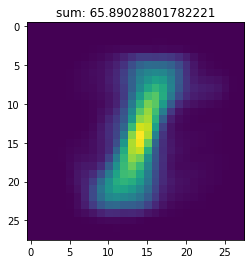

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

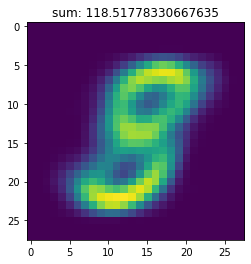

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.24856407e-04
 1.90136661e-03 3.00059418e-03 5.03069915e-03 3.83244207e-03
 4.53555159e-03 2.70350564e-03 1.40621905e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.74371163e-04 5.94177065e-05 0.00000000e+00 0.00000000e+00
 4.45632799e-04 1.297286

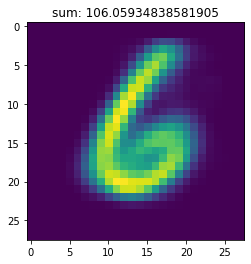

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

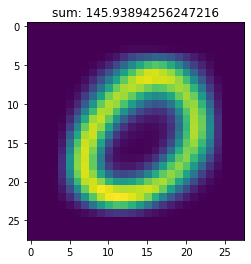

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.51515152e-03
 5.15448604e-03 6.99643494e-03 6.20915033e-03 1.22549020e-02
 8.27391563e-03 9.26916221e-03 7.97682709e-03 1.07397504e-02
 8.98692810e-03 8.16993464e-03 2.37670826e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.63398693e-04 7.57575758e-04 1.75282234e-03
 9.56625074e-03 2.119726

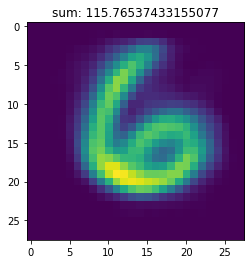

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.80844268e-03
 2.06398349e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.45250381e-04
 2.48660868e-03 2.506265

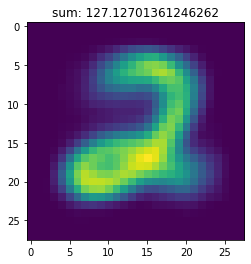

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

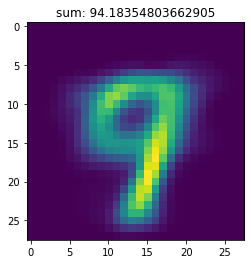

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

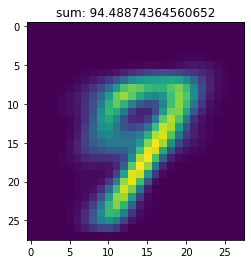

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.411764

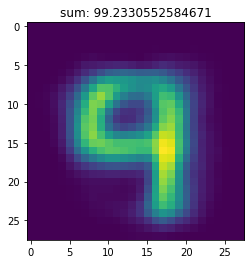

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

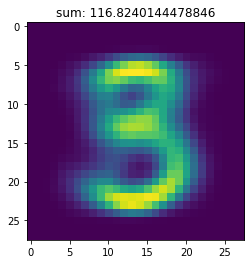

In [65]:
clusters, centroids, loss,_ = kmeans(data, k=10)

# for easy verifications, show the centroids as images,
# with titles being the sums of all dimensions of the centroids
for cen in centroids:
    sum_dim = np.sum(cen)
    print(cen)
    plt.imshow(cen.reshape(28,28))
    plt.title(f'sum: {sum_dim}')
    plt.show()

In [66]:
for cen in centroids:
    sum_dim = np.sum(cen)
    print(f'sum: {sum_dim}')

sum: 65.89028801782221
sum: 118.51778330667635
sum: 106.05934838581905
sum: 145.93894256247216
sum: 115.76537433155077
sum: 127.12701361246262
sum: 94.18354803662905
sum: 94.48874364560652
sum: 99.2330552584671
sum: 116.8240144478846


# Q3. Loss vs Iterations Plot

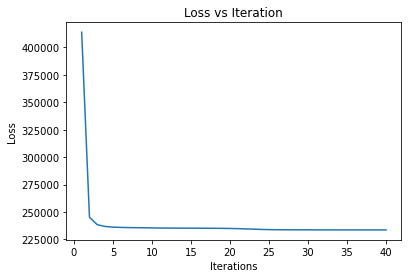

In [62]:
clusters, centroids, loss,ite = kmeans(data, k=10)

plt.title('Loss vs Iteration')
plt.plot(range(1,ite+1), loss,) 
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Q4. Choose Best K

train shape: (4000, 784), val shape: (2000, 784)


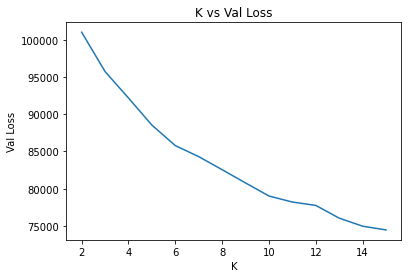

In [68]:
# slice df, convert to numpy array
data_train = np.array(data_df[:4000])
data_val = np.array(data_df[4000:])

# Show dimensions
print(f'train shape: {data_train.shape}, val shape: {data_val.shape}')

# This function picks k by elbow plot
def chose_k(reduced_train,reduced_val):
    # initialize loss lst
    loss_lst = []
    
    # try k = 2,3,...,15 # start from 2, because there's no point of clustering them into one class, we are doing a classification task.
    k_lst = range(2,16) 
    
    # collect all the val losses for different k
    for k_value in k_lst:
        # call kmeans function defined before
        clusters, centroids, _ ,_ = kmeans(reduced_train, k = k_value)
        
        # a matrix of all samples' squared euclidean distance to each centroids
        dist_sq_mat = find_dist_sq(reduced_val,centroids,k_value) # on val set
        
        # add new loss (sum up all closest dist_sq for all samples)
        loss_lst.append(np.sum([min(dist_row) for dist_row in dist_sq_mat]))

    
    plt.title('K vs Val Loss')
    plt.plot(k_lst, loss_lst) 
    plt.xlabel('K')
    plt.ylabel('Val Loss')
    plt.show()
    return loss_lst

loss_lst = chose_k(data_train,data_val)

By visualization, we can find the best k is 10. 

# Q5. Kernel Kmeans

In [25]:
def get_kernel(X):
    X_norm = np.sum(X ** 2, axis = -1)
    # numerator = -||xi - xj||^2 = - (l2_norm_sq) = -(||xi||^2 + ||xj||^2 - 2 * xi^T * xj)
    l2_norm_sq = X_norm[:,None] + X_norm[None,:] - 2 * np.dot(X, X.T) #[:,None] creat a new axis
    numerator = -l2_norm_sq
    
    N = X.shape[0]
    #demoninator =  (1/N^2) * sum (|xi - xj||^2) = (1/N^2) * sum (l2_norm_sq)
    demoninator = (1/(N ** 2)) * np.sum(l2_norm_sq)
    kernel_matrix = np.exp(numerator/demoninator)
    return kernel_matrix

small_data = np.array(data_df[:500])

print(get_kernel(small_data).shape)
print(get_kernel(small_data))

(500, 500)
[[1.         0.42356793 0.31368959 ... 0.35607876 0.44157821 0.415671  ]
 [0.42356793 1.         0.2817014  ... 0.34320126 0.34275148 0.37696311]
 [0.31368959 0.2817014  1.         ... 0.40774871 0.44471621 0.29878051]
 ...
 [0.35607876 0.34320126 0.40774871 ... 1.         0.43982207 0.40343488]
 [0.44157821 0.34275148 0.44471621 ... 0.43982207 1.         0.48823275]
 [0.415671   0.37696311 0.29878051 ... 0.40343488 0.48823275 1.        ]]


In [49]:
def RBF_kmeans(data,k = 5):
    kernel_matrix = get_kernel(data)
    
    random.seed(0)

    R = np.zeros((data.shape[0],k))
    #initially random pick k centroids
    cen_idx = random.sample(range(0,data.shape[0]),k) #cen_idx is idx of centroids in the dataset
    #print('idx: ',idx)
    for i in range(k):
        R[cen_idx[i]][i] = 1
    
    #assign samples to the closet centroid
    for sample_idx in range(data.shape[0]):
        if sample_idx in cen_idx: # if the sample is the picked centroid, continue
            continue
        else:
            lst = [kernel_matrix[sample_idx,idx] for idx in cen_idx]# a lst of K(i=sample_idx,j= position of centroid in the dataset)
            label = np.argmax(lst) # use max because,closer distance have larger kernel matrix entry (kernel is a similarity measurement)
            R[sample_idx][label] = 1
            
    #itera = 0
    converge = False
    while (not converge):
        #itera += 1
        #print(itera)
        new_R = []
        for sample_idx in range(data.shape[0]):
            cost_lst = []
            for clus_idx in range(k):# for all clusters groups
                
                #cluster population is how many samples in one class k
                cluster_population = R[:,clus_idx].sum() # sum r_jk
                rk = R[:,clus_idx]/cluster_population 
                
                cost = kernel_matrix[sample_idx,sample_idx] -2 * rk.T @ kernel_matrix[:,sample_idx] + rk.T @ kernel_matrix @ rk
                cost_lst.append(cost)
             
            # the class with min cost is the label
            label = np.argmin(cost_lst)
            
            #create a R matrix row for this sample, with a 1 in its labeled class
            new_R_row = [0]*k
            new_R_row[label] = 1
            #append it to new R
            new_R.append(new_R_row)
        
        # After classify all the samples, convert new_R to array, for checking convergence
        new_R = np.array(new_R)
        
        # check convergence
        if np.array_equal(R, new_R):
            converge = True
        else:
            R = np.array(new_R.copy())
             
    return new_R 

In [71]:
def calculate_centroids(data,R):
    # initialize centroids array in size of num of classes
    centroids = np.zeros((R.shape[1],data.shape[1]))
    
    for clus_idx in range(R.shape[1]):
        mask = R[:,clus_idx] == 1
        cluster_group = data[mask]
        cen = cluster_group.mean(axis = 0)
        centroids[clus_idx] = cen
    return centroids

In [72]:
# call these functions
indicator_matrix = RBF_kmeans(small_data,k = 5)
centroids = calculate_centroids(small_data,indicator_matrix)

## Show Results:

##### 1. Show all 5 centroids

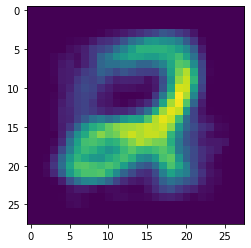

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

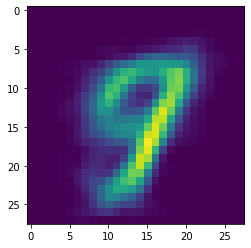

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

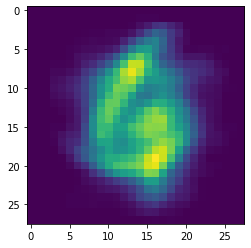

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.49554367e-03 6.14287673e-03 6.25257096e-03
 6.99300699e-03 1.75510764e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

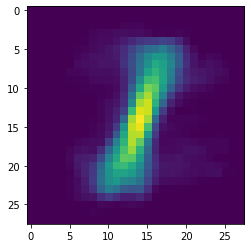

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

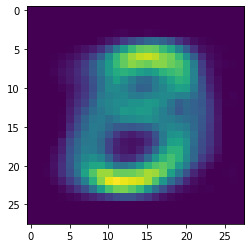

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [52]:
# I also ploted these 5 centroids as images for a quick verification :)

for cen in centroids:
    plt.imshow(cen.reshape(28,28))
    plt.show()
    print(cen,'\n')
    print('-------------------------------------------------------------')

##### 2. Show the sums for each centroid

In [73]:
for cen in centroids:
    print(np.sum(cen),'\n')

127.62925278219397 

88.7140550337782 

91.91649526943644 

67.12004901960785 

129.50529897909576 

